In [198]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [199]:
with open('data/train/train.json') as f:
	data = json.load(f)

df = pd.DataFrame(
	data.items(),
	columns=['fname', 'label'],
)

## Class Imbalance

We see that there is a large imbalance in the number of samples provided per class. We will need to correct for this by oversampling.

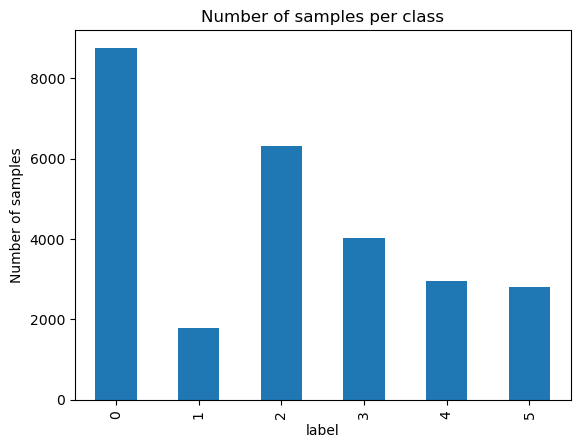

In [200]:
plt.title('Number of samples per class')
plt.xlabel('Class')
plt.ylabel('Number of samples')

df.label.value_counts().sort_index().plot(kind='bar')
plt.show()

## As Video

These snapshots are in fact frames taken from a video. We can group by the file names.

In [201]:
grouped_df = df.groupby(df.fname.str.split('/').str[0])
print('Folders with more than one label:', (grouped_df.label.nunique() != 1).sum())

Folders with more than one label: 0


The imbalance in classes is worse when handling the frames as videos

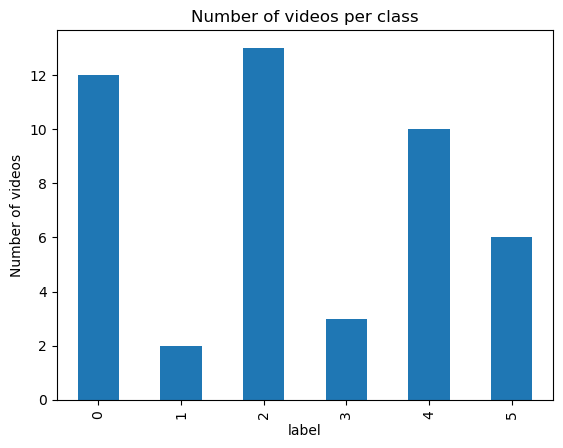

In [202]:
plt.title('Number of videos per class')
plt.xlabel('Class')
plt.ylabel('Number of videos')
grouped_df.label.unique().apply(int).value_counts().sort_index().plot(kind='bar')
plt.show()

## Showing Samples per class

By viewing a few samples from each class, we see that we can further crop the image down a bit to the area of the weld. We also see that there are many instances where singular frames from different classes look very similar.

In [203]:
samples = [[]] * 6
for label in range(6):
	fnames = list(df[df.label == label].fname.sample(10))
	samples[label] = [Image.open(f'data/train/{fname}') for fname in fnames]

In [204]:
id_to_label = {
	0: 'good weld',
	1: 'burn through',
	2: 'contamination',
	3: 'lack of fusion',
	4: 'misalignment',
	5: 'lack of penetration',
}

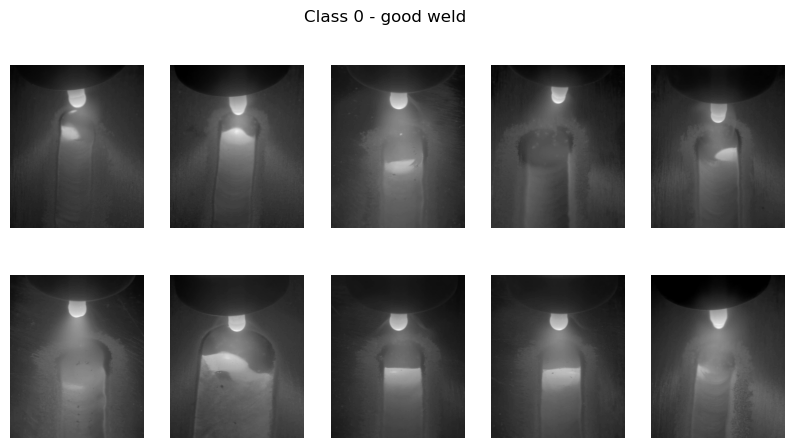

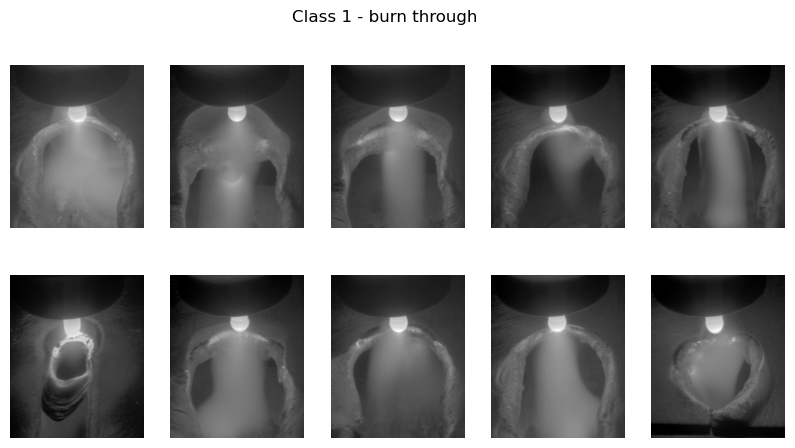

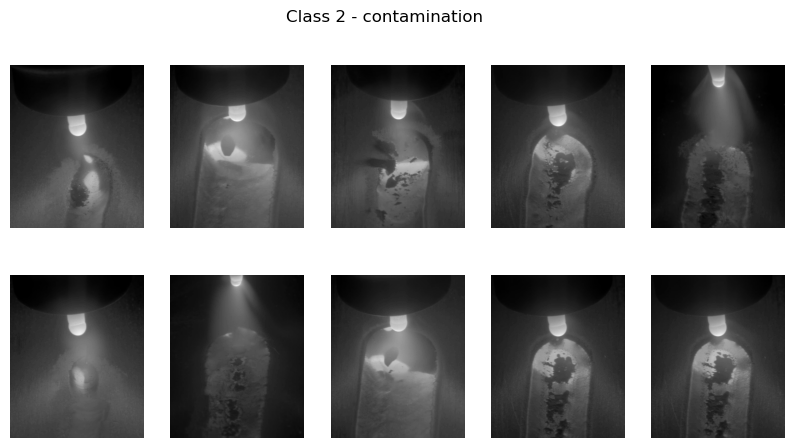

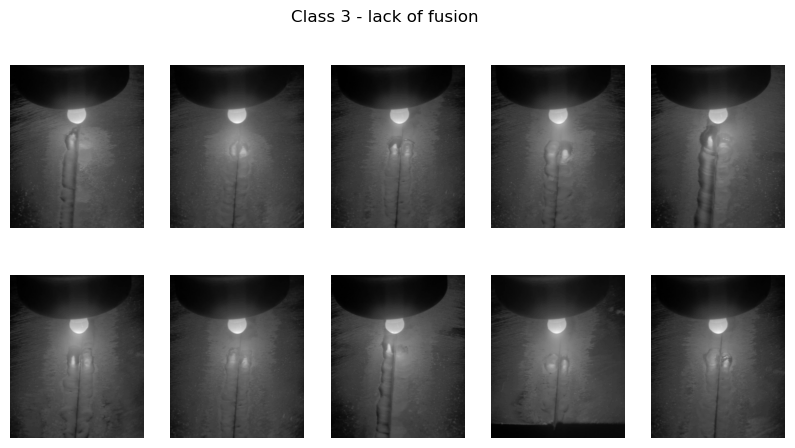

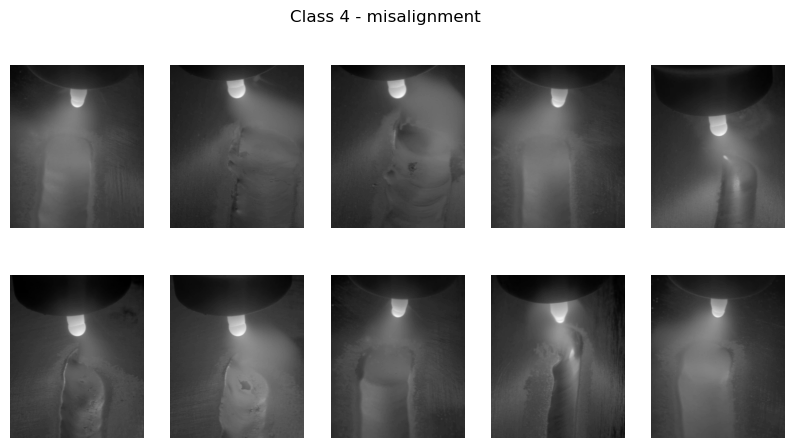

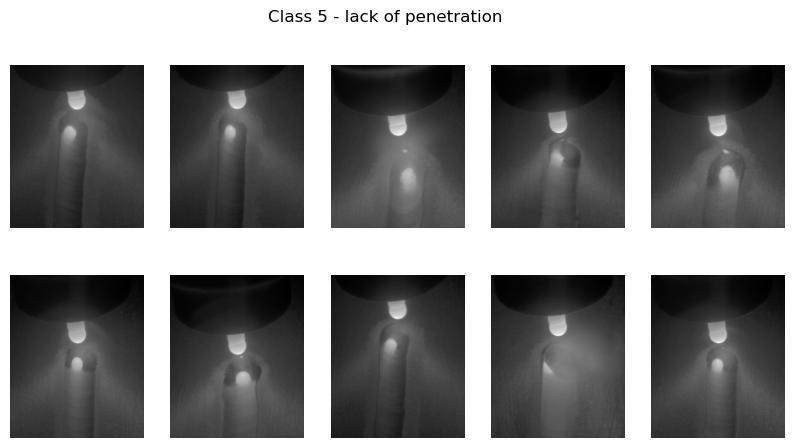

In [ ]:
for label, images in enumerate(samples):
	plt.figure(figsize=(10, 5))
	plt.suptitle(f'Class {label} - {id_to_label[label]}')
	for i, image in enumerate(images):
		plt.subplot(2, 5, i + 1)
		plt.imshow(image, cmap='gray', vmin=0, vmax=255)
		plt.axis('off')
	plt.show()